### Housing Price Analysis

Analyzing Immoscout data from 18.12.2022 for Zurich, Bern, Basel, Lucerne, Geneva and Lugano. The data was scraped without filters.

In [1]:
from matplotlib import pyplot as ply
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido


In [ ]:
#Reading the data
df=pd.read_excel("C:\\Users\\sew-th\\Documents\\Python Datasets\\immoscout24.xlsx")
print(df.shape)
print(df.head())

(2118, 4)
  City  Rooms  Area   Price
0   ZH    2.5    71  4100.0
1   ZH    2.5    69  3950.0
2   ZH    2.5    69  3950.0
3   ZH    2.5    50  2750.0
4   ZH    1.5    34  1650.0


In [3]:
df['City'].value_counts()

City
BS     713
BE     416
ZH     364
GE     256
LUG    232
LU     137
Name: count, dtype: int64

- There are 4 columns: City, Rooms, Area and Price
- In terms of Cities, the data is unbalanced. 713 entries for Basel and only 137 for Lucerne.
- While not ideal,it is fine for this project. For a real analysis, the samples must be balanced and randomized.
<p>

- Check for outliers in the data:

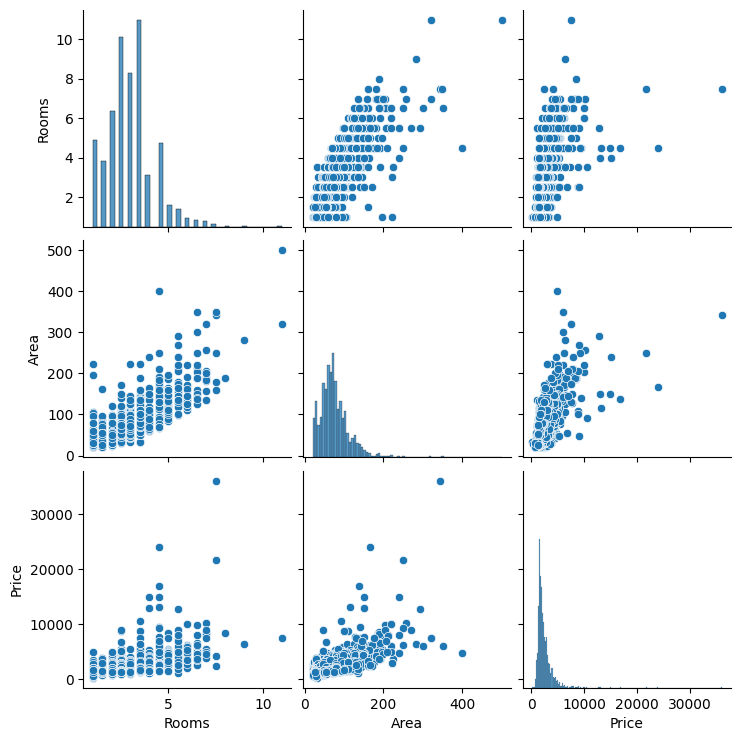

In [4]:
#Check for outliers.
sns.pairplot(df)
plt.show()

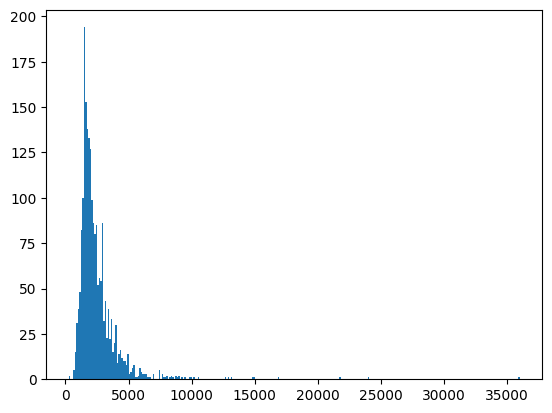

In [5]:
plt.hist(df['Price'],bins=300)
plt.show()

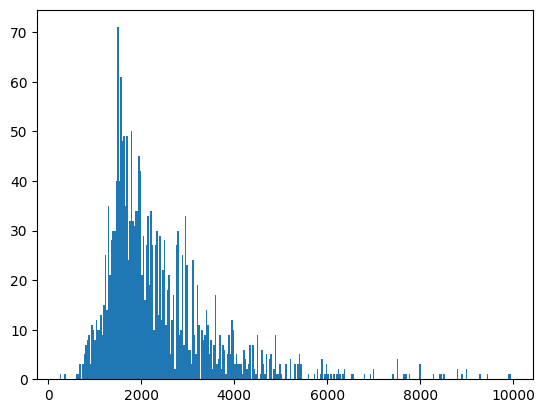

In [6]:
# Delete rows with prices over 10'000.
df = df[df['Price']<=10000]
plt.hist(df['Price'],bins=300)
plt.show()

#### What is the price distribution for each City?

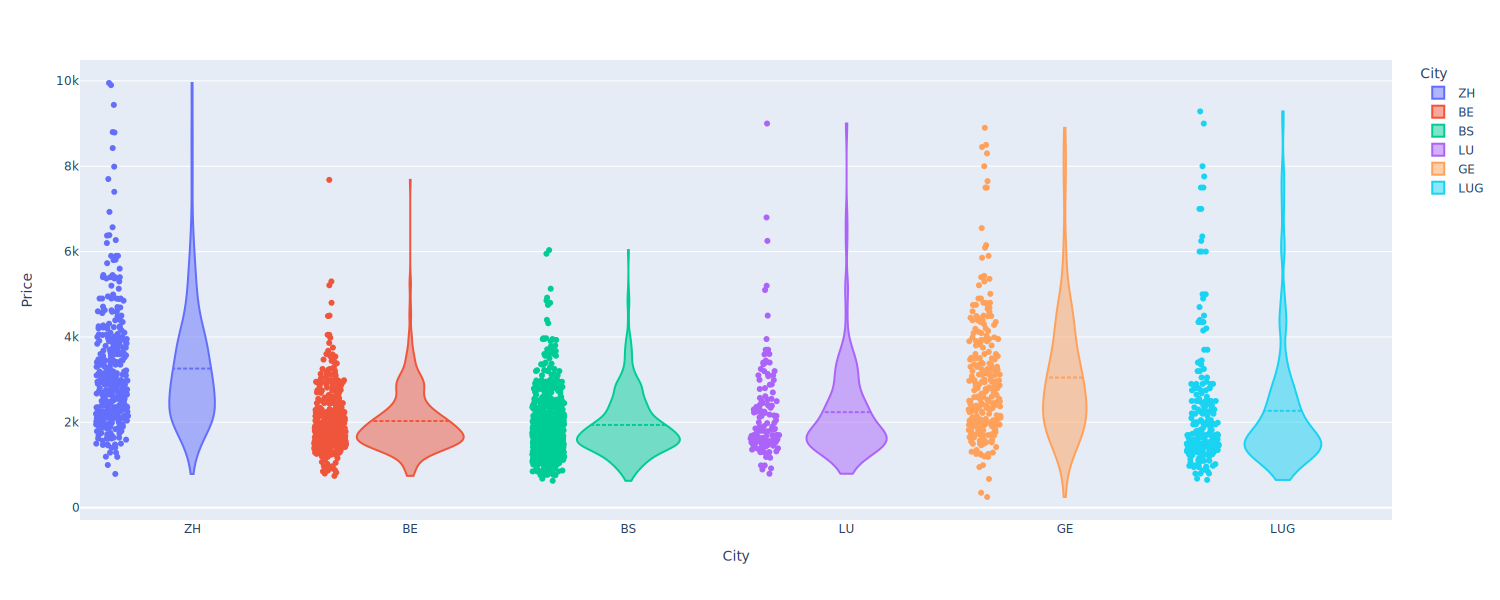

In [7]:
fig=px.violin(df,x= 'City',y= 'Price', color='City', points='all',width=1500, height=600 ).update_traces(spanmode='hard', meanline_visible=True)
fig.show('svg')

The plot above displays a much higher average price for Zurich and Geneva than for the other cities.\
Lugano has a low average price but has as many higher priced listings as Geneva and Zurich
<p>

Geneva's distribution differs from Zurich. Geneva has more listing concentrated around 8'000 CHF, while Zurich is more dispersed at the top end:

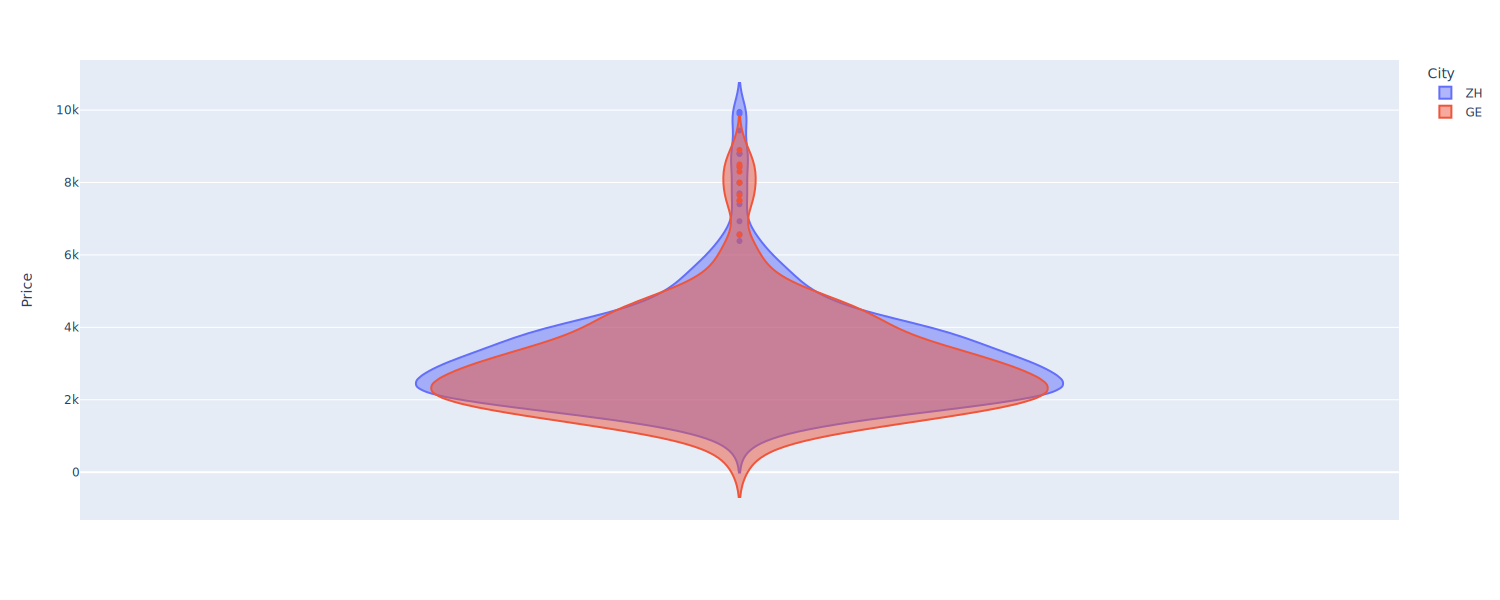

In [8]:
fig=px.violin(df.loc[df['City'].isin(['ZH','GE'])],y= 'Price', color='City', violinmode='overlay',width=1500, height=600)
fig.show('svg')

We can calculate the cost per room and the cost per square meter:

In [10]:
df['PricePerRoom']=df['Price']/df['Rooms']
df['PricePerArea']=df['Price']/df['Area']


According the the heatmap below, there are several insights:
- Rooms and Price correlate with 0.58. This means more rooms do not translate to higher prices one to one. 
- Are and Price have a slightly higher correlation
- Reasons are that in the data we have no information where exactly the houses are located and how new they are. Obviously this has a much larger impact than just rooms alone.
- The price per room decreased with more rooms. Square meters (Area) has low correlation with price per room.

<Axes: >

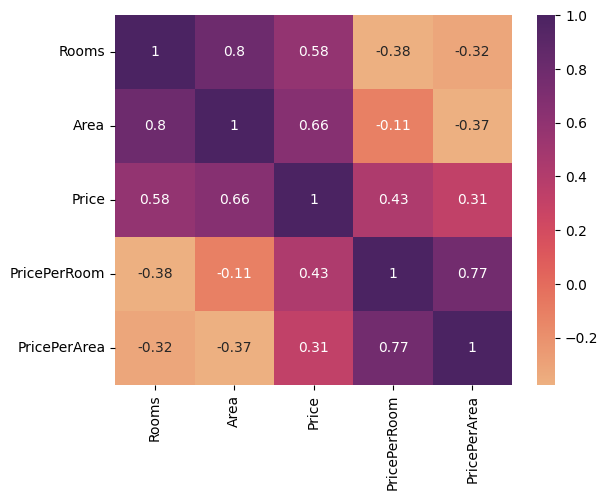

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare')

Another view to look at distribution is a ridgeline plot.

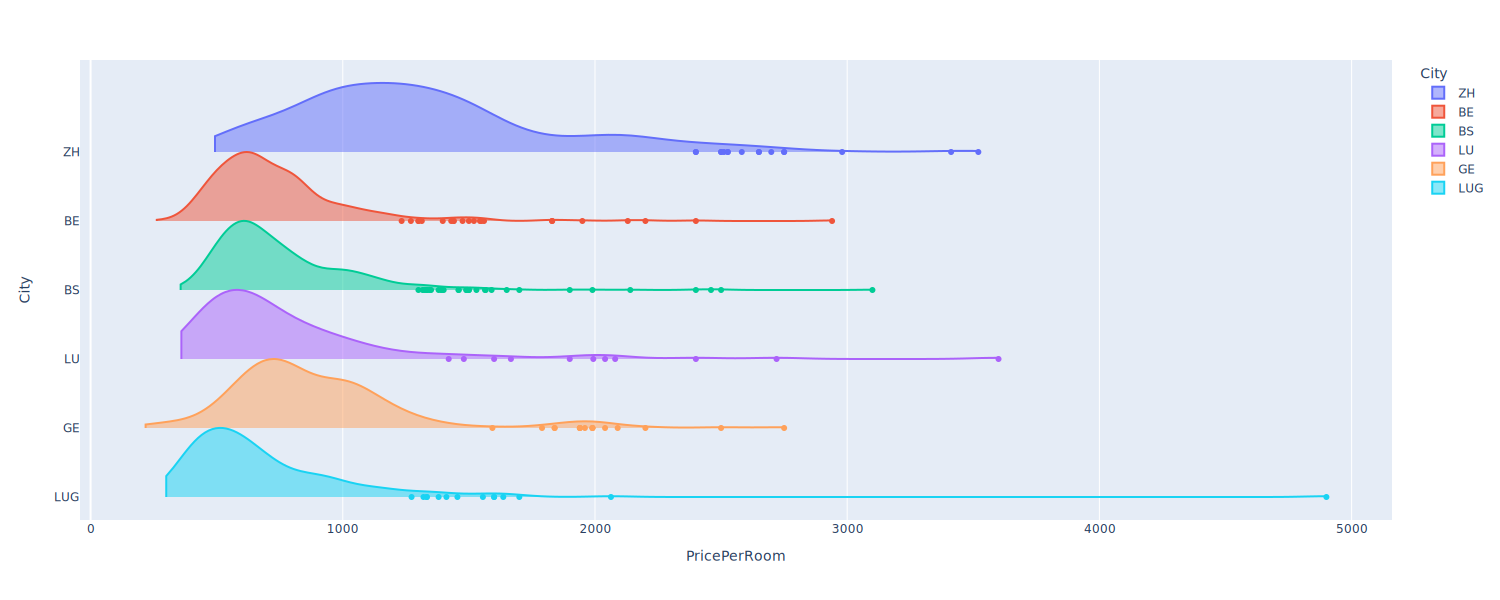

In [14]:
fig=px.violin(df, x='PricePerRoom', y='City', orientation='h', color='City',width=1500, height=600).update_traces(side="positive", width=2, spanmode='hard')
fig.show('svg')

The histograms below show how the listings differ in terms of rooms. Basel provides many half rooms (2.5, 3.5) whereas Lugano does not offer it. Surprisingly Zurich does not offer many 3 room apartments.

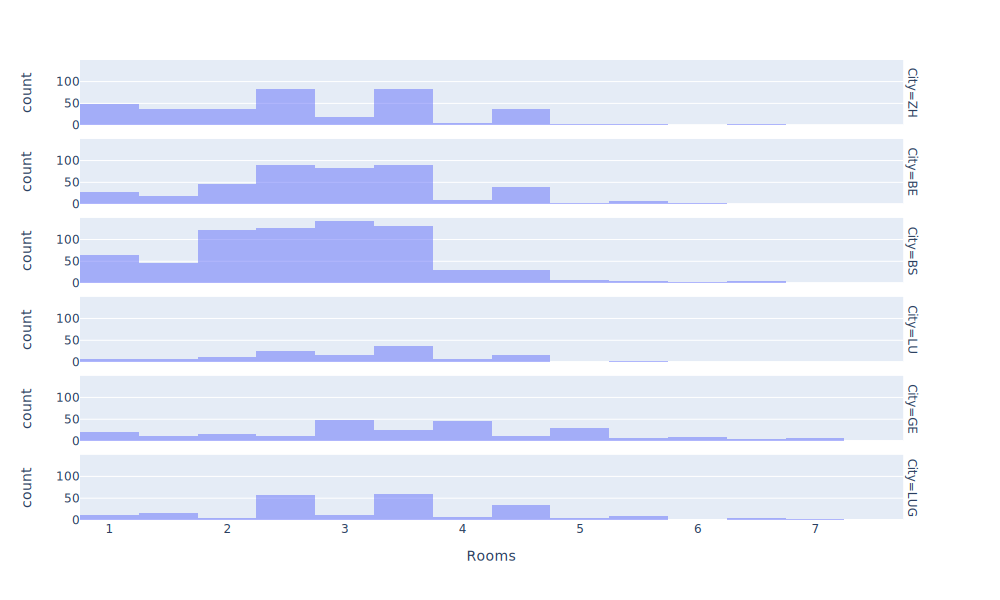

In [18]:
fig=px.histogram(df[df['Rooms']<8], x='Rooms', facet_row='City', barmode='overlay',width=1000, height=600)
fig.show('svg')

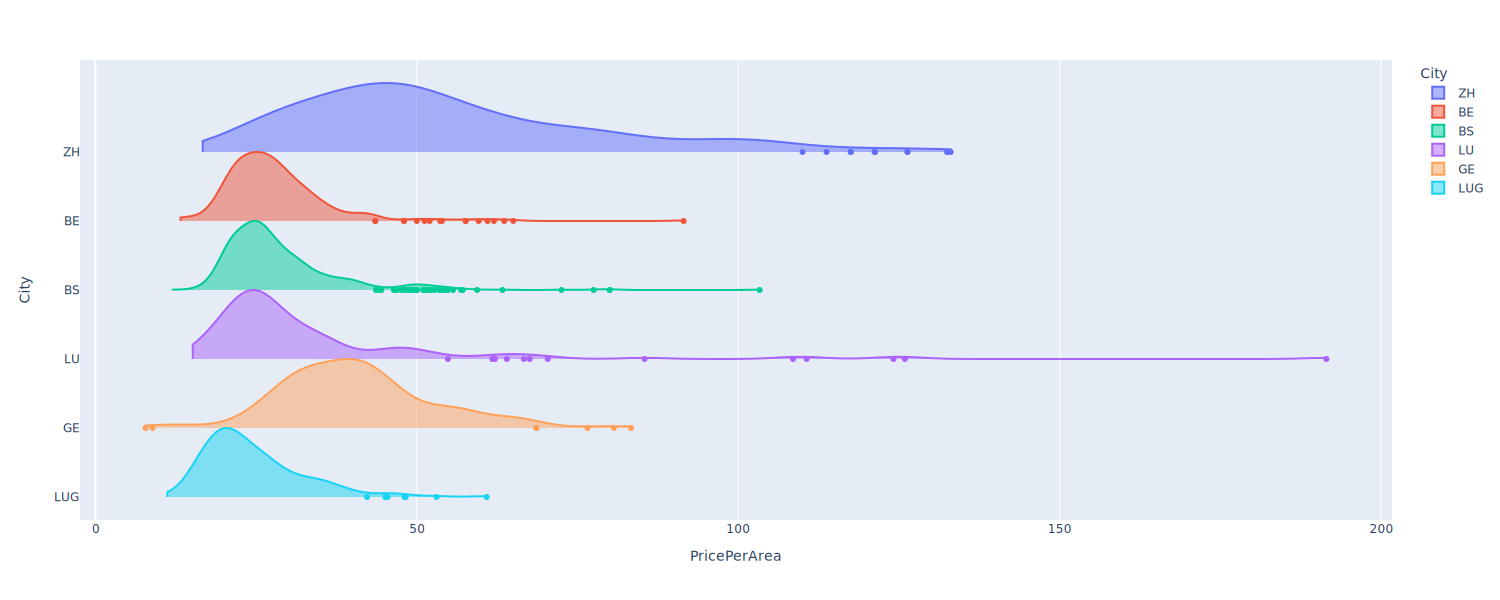

In [19]:
fig=px.violin(df, x='PricePerArea', y='City', orientation='h', color='City',width=1500, height=600).update_traces(side="positive", width=2, spanmode='hard')
fig.show('svg')

---

#### This concludes the analysis for now. For a real housing analysis we would need much more data. Since this is out of scope for this small project and further analysis would lead to insufficient knowledge generation, I will stop here. This small project is here to showcase my learning in working with pandas. 